In [2]:
# Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')

In [4]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


#### EDSA

In [5]:
train_df.shape

(33000, 2)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


The data has no null values, 

In [7]:
train_df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

The data has eleven language Id's, i.e. The data has eleven lanuages

In [8]:
# Checking whether a character is white-space character or not
print(len(train_df['text']))
print(sum(train_df['text'].apply(lambda x: x.isspace())))

33000
0


Text(0.5, 1.0, 'The lang_id count plot')

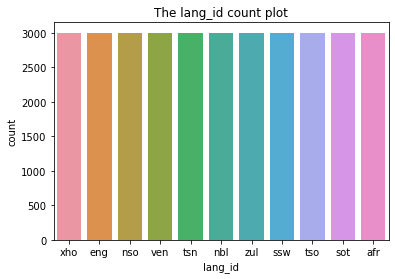

In [9]:
ax = sns.countplot(x ='lang_id', data = train_df)
ax.set_title('The lang_id count plot')


From the plot above we observe that each language appeared 3000 times

In [10]:
train_df['text'][2]

'the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months'

In [11]:
# Languages
languages = set(train_df['lang_id'])
print('Languages', languages)
print('========')
# Examples of multiple langs taken from heads and tails
print('English:', train_df['text'][2])

print('Xhosa:', train_df['text'][1])

Languages {'nbl', 'afr', 'eng', 'sot', 'tsn', 'tso', 'nso', 'xho', 'zul', 'ven', 'ssw'}
English: the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
Xhosa: i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo


#### Creating Independent and Dependent features

Because the language is dependent on the text utilized, the text is the independent feature in this case.

In [12]:
X = train_df["text"]
y = train_df["lang_id"]

The name of languages, the dependent variable, is a categorical variable. We'll need to convert it to a numerical form in order to train the model, therefore we'll use label encoding on that output variable.

In [13]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)

#### Data preprocessing

In [14]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

#### Bag of Words
As we already aware, the numerical form should be used for both the output and the input features. So, using CountVectorizer, we create a Bag of Words model to translate text into numerical form..

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(33000, 105196)

#### Splitting the data into Train and test Sets

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#### Building a Model

We are using the naive_bayes algorithm for our model creation and we tarin the model using the training set we created 

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(x_test)

#### Model Evaluation
Any machine learning project must include a performance evaluation of the machine learning model that we constructed.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9995454545454545


The model's accuracy is 0.99, which is excellent, and our model is working well. Next we use the seaborn heatmap to plot the confusion matrix.

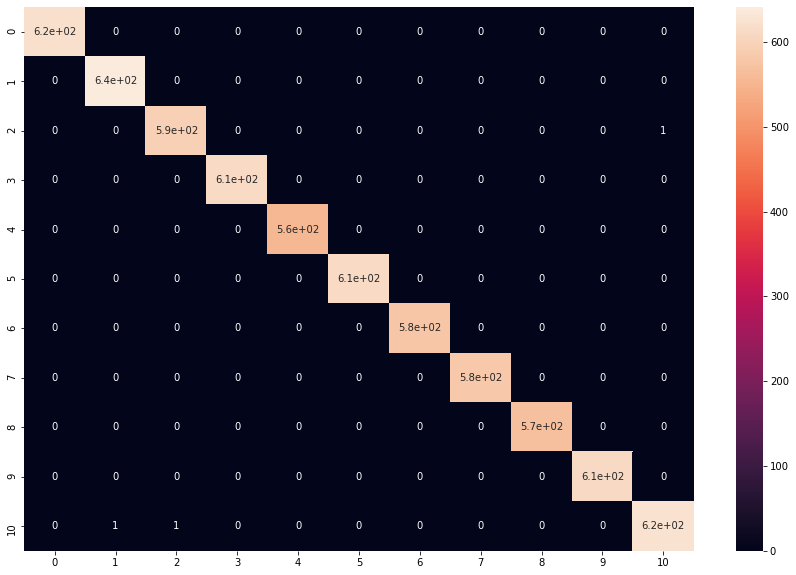

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [25]:
X_t = train_df["text"]
y_t = train_df["lang_id"]

In [26]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X_t:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [30]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = Encoder.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [31]:
test_df.text.head()

0    Mmasepala, fa maemo a a kgethegileng a letlele...
1    Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2           Tshivhumbeo tshi fana na ngano dza vhathu.
3    Kube inja nelikati betingevakala kutsi titsini...
4                        Winste op buitelandse valuta.
Name: text, dtype: object

In [32]:
test_df.text.tail()

5677                     You mark your ballot in private.
5678    Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679    E Ka kopo etsa kgetho ya hao ka hloko, hobane ...
5680    TB ke bokudi ba PMB, mme Morero o tla lefella ...
5681                Vakatjhela iwebhusayidi yethu ku-www.
Name: text, dtype: object

In [33]:
predict(text)

The langauge is in sot


In [34]:
predict('Uzakwaziswa ngokufaneleko nakungafuneka eminye')

The langauge is in nbl


In [35]:
predict('E Ka kopo etsa kgetho ya hao ka hloko')

The langauge is in sot


In [36]:
predict('Tshivhumbeo tshi fana na ngano dza vhathu')

The langauge is in ven


In [37]:
predict('You mark your ballot in private')

The langauge is in eng


In [38]:
predict('Kube inja nelikati betingevakala kutsi')

The langauge is in ssw


In [39]:
predict('Ge o ka kgetha ka bowena go se šomiše Mofani')

The langauge is in nso


In [40]:
predict('Kube inja nelikati betingevakala kutsi')

The langauge is in ssw


In [41]:
predict('Kube inja nelikati betingevakala kutsi')

The langauge is in ssw
